In [ ]:
#![jupyter](./images/决策树.png)

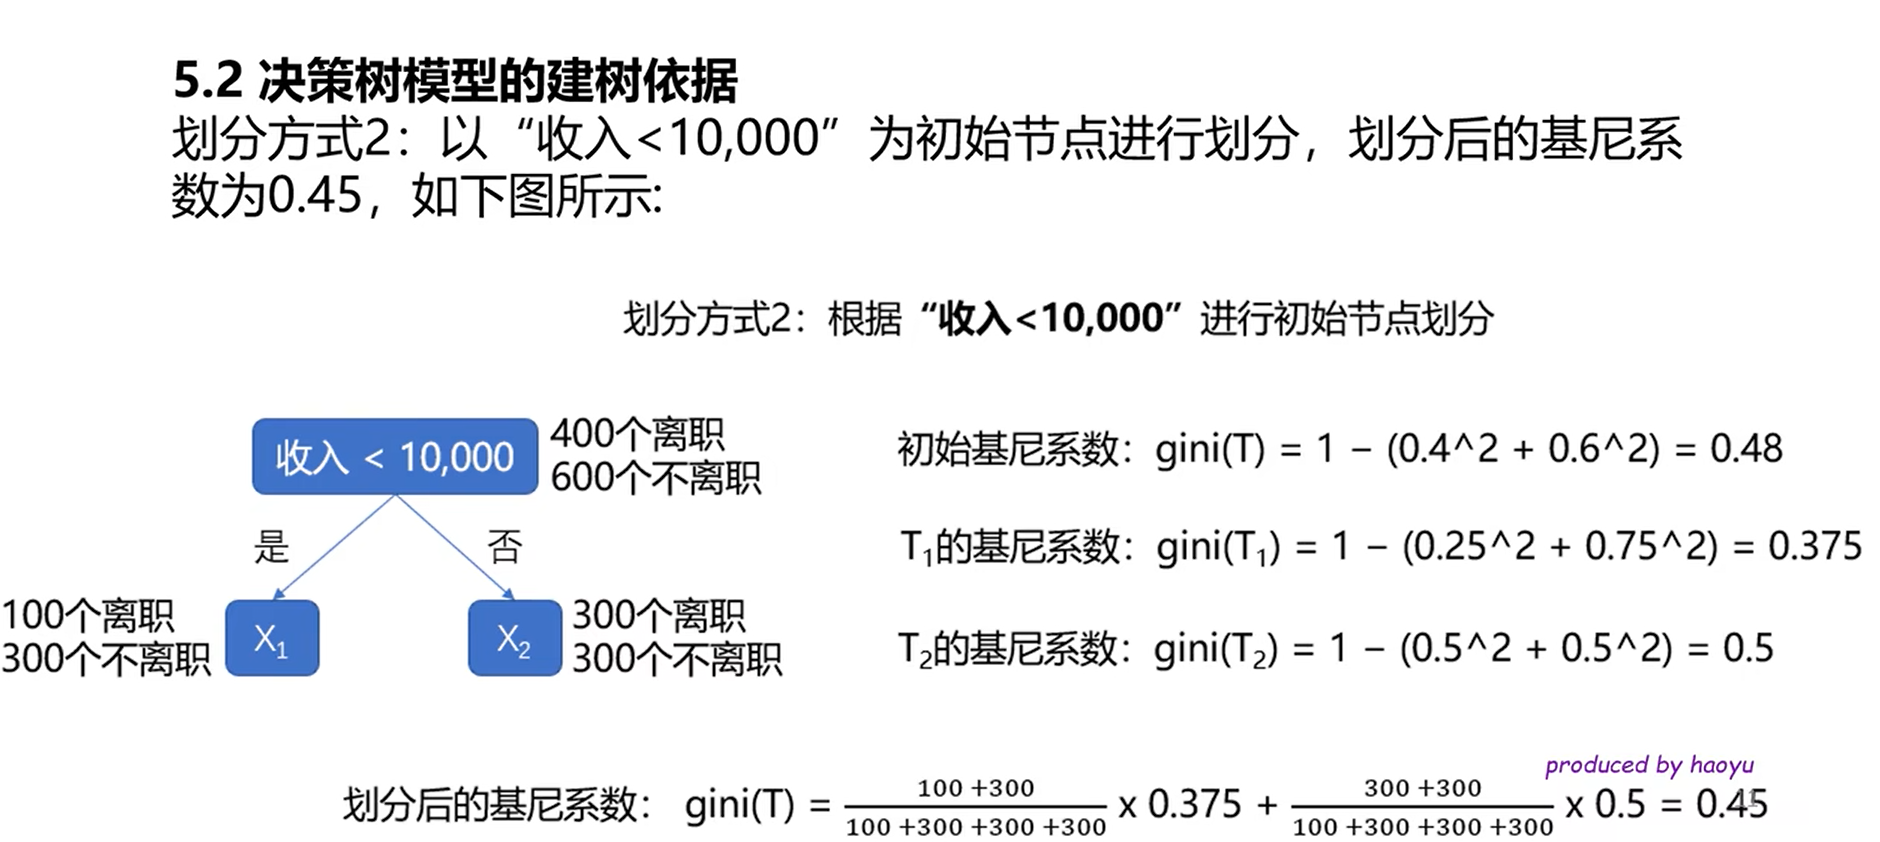

In [ ]:
class sklearn.tree.DecisionTreeClassifier
                       (class_weight=None,        # 类别权重
                        criterion='gini',         # 选择特征的标准。默认是gini基尼系数,也可以是entropy信息增益
                        max_depth=None,           # 决策树的最大深度
                        max_features=None,        # 划分数据集时考虑的最多的特征值数量
                        max_leaf_nodes=None,      # 最大叶子节点数
                        min_impurity_decrease=0.0, # 节点划分最小不纯度
                        min_impurity_split=None,   # 节点划分的最小信息增益
                        min_samples_leaf=1,        # 叶子结点最小样本数
                        min_samples_split=2,       # 节点划分的最小样本数
                        min_weight_fraction_leaf=0.0, 
                        presort=False, 
                        random_state=None,
                        splitter='best'     # 选择属性特征的原则，best选所有特征中最好的，random选部分特征中最好的。
                        )

类的属性：

classes_ : 
feature_importances_ : 特征重要性
分类步骤：
    

In [8]:
# DTC:DecisionTreeClassifier
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=1,shuffle=True)
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)  # 拟合，就是训练

DecisionTreeClassifier()

In [6]:
print(iris.feature_names)  # 特征信息
DTC.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.00752037, 0.03133487, 0.57201197, 0.38913279])

In [18]:
y_pred = DTC.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.9666666666666667


In [19]:
DTC.score(X_test, y_test)

0.9666666666666667

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DTC.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# 输出的树信息

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(DTC, out_file = 'classify_tree.dot',
               feature_names = iris.feature_names, class_names = iris.target_names)  # 会生成一个classify_tree.dot文件

with open('classify_tree.dot') as f:
    dot_graph = f.read()
print(dot_graph)

digraph Tree {
node [shape=box] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica"] ;
1 [label="gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor"] ;
3 -> 4 ;
5 [label="petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica"] ;
5 -> 6 ;
7 [label="sepal length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nva

使用graphviz（要安装），转成pdf，查看图：
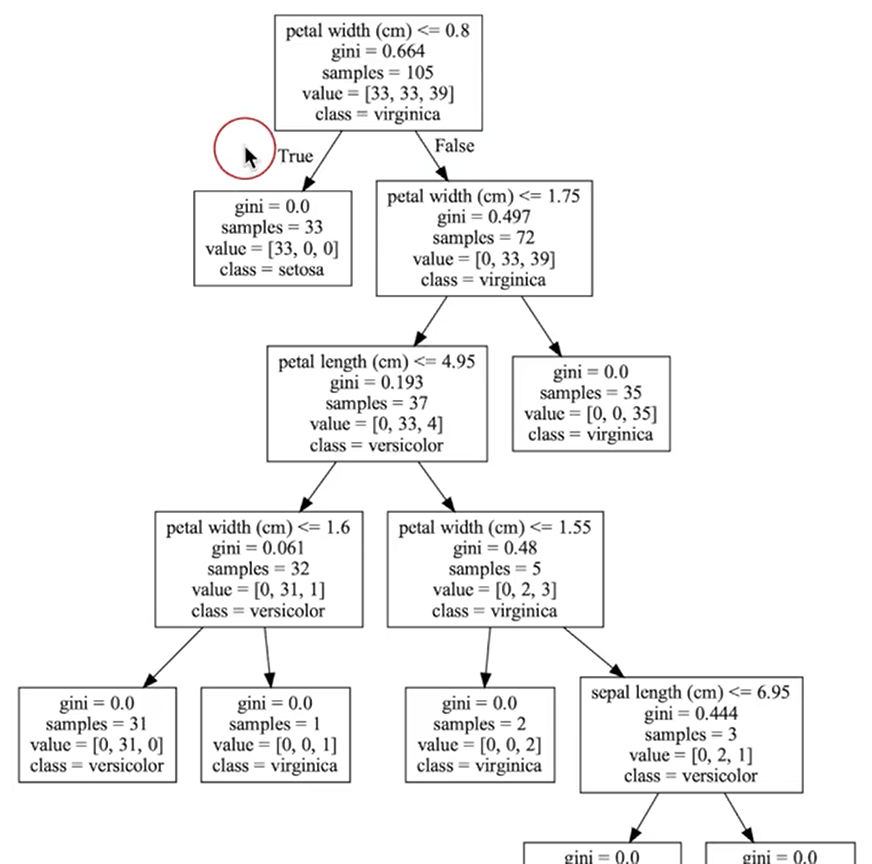

分类与回归的区别就是：**分类问题的因变量是分类变量，回归中因变量是连续变量**

分类决策树中，用**信息熵**表示节点的**混乱程度(不纯度)**

回归决策树中，改用**均方差**来表示混乱程度就好

分类决策树中，叶子节点中的**众数**就是输出结果

回归决策树中，改用叶子节点的**平均数**作为结果就好

In [24]:
# DTC用于回归，回归决策树DTR
from sklearn.tree import DecisionTreeRegressor

boston = datasets.load_boston()
X = boston.data
y = boston.target
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [25]:
DTR = DecisionTreeRegressor(max_depth = 3)  # 进行剪枝
DTR.fit(X, y)
print(DTR.score(X, y))

ValueError: Expected 2D array, got 1D array instead:
array=[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.  22.6 24.4 22.5 24.4 20.
 21.7 19.3 22.4 28.1 23.7 25.  23.3 28.7 21.5 23.  26.7 21.7 27.5 30.1
 44.8 50.  37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.  24.  25.1 31.5
 23.7 23.3 22.  20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8
 29.6 42.8 21.9 20.9 44.  50.  36.  30.1 33.8 43.1 48.8 31.  36.5 22.8
 30.7 50.  43.5 20.7 21.1 25.2 24.4 35.2 32.4 32.  33.2 33.1 29.1 35.1
 45.4 35.4 46.  50.  32.2 22.  20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9
 21.7 28.6 27.1 20.3 22.5 29.  24.8 22.  26.4 33.1 36.1 28.4 33.4 28.2
 22.8 20.3 16.1 22.1 19.4 21.6 23.8 16.2 17.8 19.8 23.1 21.  23.8 23.1
 20.4 18.5 25.  24.6 23.  22.2 19.3 22.6 19.8 17.1 19.4 22.2 20.7 21.1
 19.5 18.5 20.6 19.  18.7 32.7 16.5 23.9 31.2 17.5 17.2 23.1 24.5 26.6
 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6 25.  19.9 20.8 16.8
 21.9 27.5 21.9 23.1 50.  50.  50.  50.  50.  13.8 13.8 15.  13.9 13.3
 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5 15.1 23.2
  9.7 13.8 12.7 13.1 12.5  8.5  5.   6.3  5.6  7.2 12.1  8.3  8.5  5.
 11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3  7.   7.2  7.5 10.4  8.8  8.4
 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.   9.5 14.5 14.1 16.1 14.3
 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6
 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.  16.4 17.7
 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3
 16.7 12.  14.6 21.4 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.
  8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9
 22.  11.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
print(boston.feature_names)  # 特征信息
DTC.feature_importances_

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


array([0.01253395, 0.01880092, 0.07584566, 0.89281948])

In [14]:
export_graphviz(DTR, out_file = 'regress_tree.dot',feature_names = boston.feature_names) 
with open('classify_tree.dot') as f:
    dot_graph = f.read()
print(dot_graph)

digraph Tree {
node [shape=box] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica"] ;
1 [label="gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor"] ;
3 -> 4 ;
5 [label="petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica"] ;
5 -> 6 ;
7 [label="sepal length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nva

In [26]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 